In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MaxNLocator
%matplotlib inline

/home/taranto/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1298: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/taranto/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1303: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


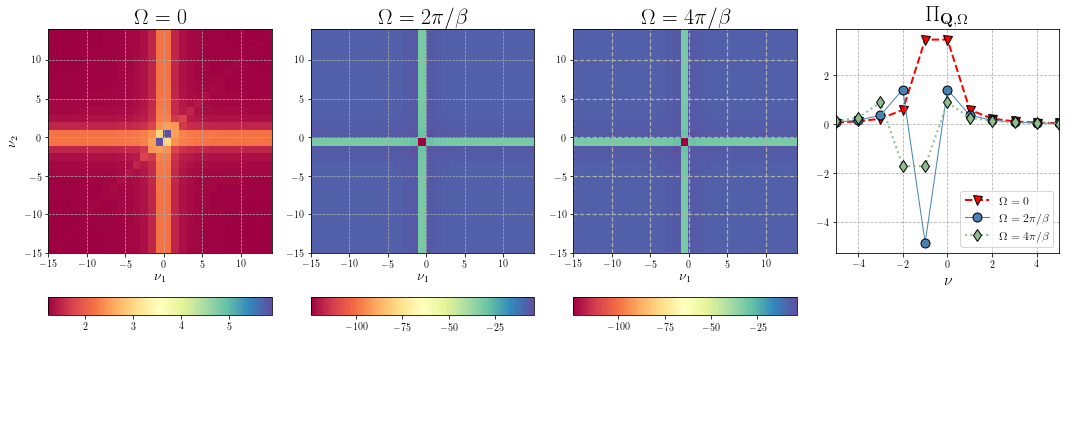

In [2]:
plt.clf()

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('Spectral')
filenamebolla='../data/PL_chi_nu.txt'
filename0 = '../data/PL_density_0.txt'
filename1 = '../data/PL_density_1.txt'
filename2 = '../data/PL_density_1.txt'

def plotBubble(ax):
    ms = 9.0
    bolla = np.loadtxt('../data/PL_chi_nu.txt')

    ax.plot( bolla[:,0], bolla[:,1] , marker ='v', markeredgecolor='black',markersize =ms,color='r', label=r'$\Omega=0$',
        linewidth=2.0, linestyle='dashed')
    ax.plot( bolla[:,0], bolla[:,2] , marker ='o', markeredgecolor='black',markersize=ms,color='steelblue', label=r'$\Omega=2\pi/ \beta$',
        linewidth=1.0, linestyle='solid')
    ax.plot( bolla[:,0], bolla[:,3] , marker= 'd',markeredgecolor= 'black',markersize=ms, color='darkseagreen', label=r'$\Omega=4\pi/ \beta$',
        linewidth=2.0, linestyle='dotted')
    ax.axes.grid(linestyle='dashed')
    ax.legend(loc=4,fontsize=12)

    ax.set_xlim([-5,5])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
    
    ax.set_xlabel(r'$\nu$', fontsize=16)
    #ax.text(-1.,-8.0,r'$\Pi_{\mathbf{Q},\Omega}$',fontsize=22)
    ax.set_title(r'$\Pi_{\mathbf{Q},\Omega}$',fontsize=22)
    
def plotDen(filename,ax,lab, isFirstPlot, gw=0.7):

    matriciona = -np.loadtxt(filename)[:]

    center = matriciona.shape[0]/2
    #print np.shape(matriciona), "min, max: ", np.min(matriciona), np.max(matriciona)
    x = np.arange(-matriciona.shape[0]/2, matriciona.shape[0]/2)
   
    im= ax.pcolormesh(x,x,matriciona[:],cmap=cmap ) 
 
    ax.set_xlim([-15,14])
    ax.set_ylim([-15,14])
    ax.grid(linestyle='dashed',linewidth=gw)
    
    ax.set_xlabel(r'$\nu_1$', fontsize=14)
    if isFirstPlot:
        ax.set_ylabel(r'$\nu_2$', fontsize=14)
    ax.set_aspect(1)

    ax.set_title(lab, fontsize=22)
    #ax.text(-13,10.5,lab, fontsize=20)
    return im 

    
fig, ((ax1, ax2, ax3, bb1),(ax4,ax5,ax6, bb2)) = plt.subplots(ncols=4,nrows=2, figsize=(15,6))
bb2.axis('off')
im1=plotDen(filename0,ax1,r'$\Omega=0$', True)
im2=plotDen(filename1,ax2,r'$\Omega=2\pi/ \beta$', False)
im3=plotDen(filename2,ax3,r'$\Omega=4\pi/ \beta$', False, gw=1.2)

# Plot bubble 
plotBubble(bb1)

ax4.set_aspect(0.08)
ax5.set_aspect(0.08)
ax6.set_aspect(0.08)

cb4 = plt.colorbar(im1,cax=ax4,orientation='horizontal')
cb5 = plt.colorbar(im2,cax=ax5,orientation='horizontal')
cb6 = plt.colorbar(im3,cax=ax6,orientation='horizontal')

for cb in (cb4,cb5,cb6):
    cb.locator = MaxNLocator(5)
    cb.update_ticks()

plt.subplots_adjust(hspace=-1.2)
plt.tight_layout()
#plt.subplots_adjust(wspace = 0.04)
plt.savefig('../images/juppy/PL_all.png',dpi=300)